In [1]:
from skimage.io import imshow
from tensorflow.keras.layers import Concatenate
import tensorflow.keras.backend as K


In [3]:
import numpy as np
import SimpleITK as sitk
import pandas as pd
from nilearn import plotting
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
from tqdm import tqdm


def get_np_volume_from_sitk(sitk_img):
    trans = (2, 1, 0)
    px_spacing = sitk_img.GetSpacing()
    img_position = sitk_img.GetOrigin()
    np_img = sitk.GetArrayFromImage(sitk_img)
    np_img = np.transpose(np_img, trans)
    return np_img, px_spacing, img_position


_id = "CHGJ007"
img_count = 0

dir_path = "./hecktor_train/hecktor_nii/"
bb_path = './hecktor_train/bbox.csv'
bb_dict = pd.read_csv(bb_path).set_index('PatientID')


ct_path = dir_path + _id + "/" + _id + "_ct.nii.gz"
gt_path = dir_path + _id + "/" + _id + "_ct_gtvt.nii.gz"

ct_img, spacing, origin = get_np_volume_from_sitk(sitk.ReadImage(ct_path))
gt_img, spacing, origin = get_np_volume_from_sitk(sitk.ReadImage(gt_path))

bb = np.round((np.asarray([
bb_dict.loc[_id, 'x1'],
bb_dict.loc[_id, 'y1'],
bb_dict.loc[_id, 'z1'],
bb_dict.loc[_id, 'x2'],
bb_dict.loc[_id, 'y2'],
bb_dict.loc[_id, 'z2']
]) - np.tile(origin, 2)) / np.tile(spacing, 2)).astype(int) 
    
ct = np.zeros_like(ct_img).astype(np.uint8)
gt = np.zeros_like(gt_img).astype(np.uint8)
    
ct = ct_img[bb[0]:bb[3], bb[1]:bb[4], bb[2]:bb[5]]
gt = gt_img[bb[0]:bb[3], bb[1]:bb[4], bb[2]:bb[5]]
    
    #ct_img = resize(ct_img, (109, 109, 109), mode="constant", preserve_range=True)
    #gt_img = resize(gt_img, (109, 109, 109), mode="constant", preserve_range=True)

#X[img_count, :, :, :] = ct_img
#y[img_count, :, :, :] = gt_img
    


In [18]:
_id = "CHGJ007"
img_count = 0

dir_path = "./hecktor_train/hecktor_nii/"
bb_path = './hecktor_train/bbox.csv'
bb_dict = pd.read_csv(bb_path).set_index('PatientID')


ct_path = dir_path + _id + "/" + _id + "_ct.nii.gz"
gt_path = dir_path + _id + "/" + _id + "_ct_gtvt.nii.gz"

ct_img, spacing, origin = get_np_volume_from_sitk(sitk.ReadImage(ct_path))
gt_img, spacing, origin = get_np_volume_from_sitk(sitk.ReadImage(gt_path))


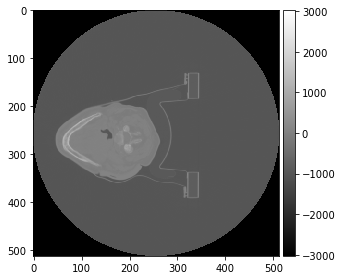

In [28]:
imshow(ct_img[:,:,47], cmap="gray")

In [20]:
ct_img.shape

(512, 512, 91)

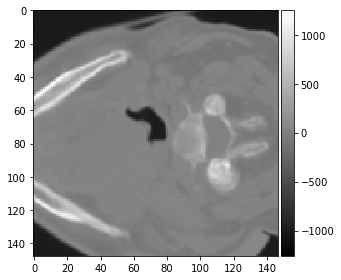

In [12]:
imshow(ct[:,:,22], cmap="gray")

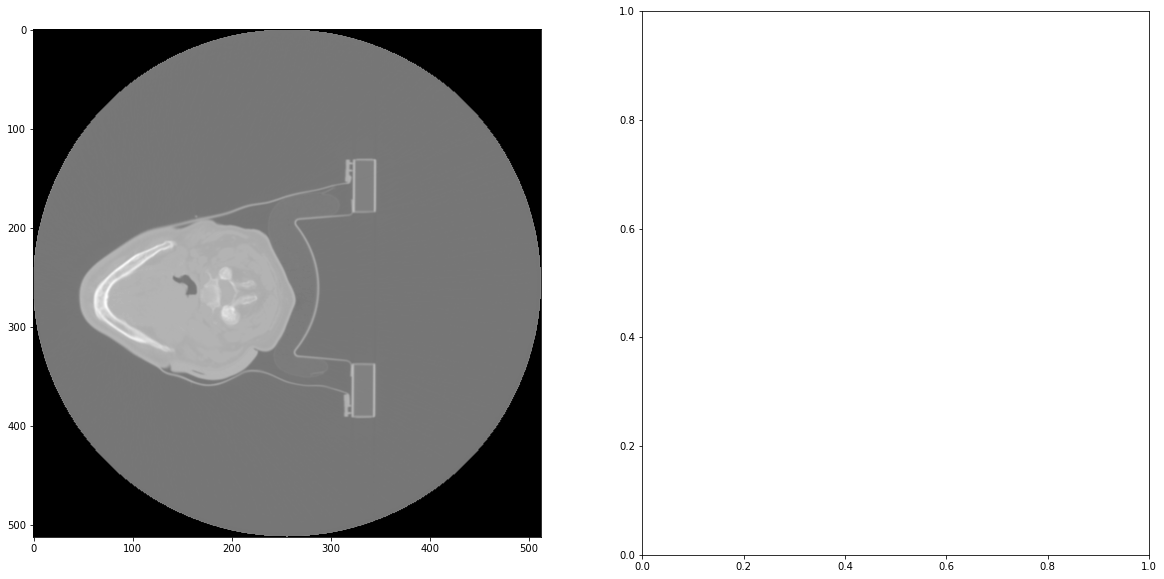

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(ct_img[:,:,47], cmap="gray")
#ax[0].contour(gt[:,:,22], [.5], colors="red")    
#ax[0].set_title('Original Image')

    #ax[1].imshow(img_array[slice_index,:,:,0], cmap="gray")
    #ax[1].contour(model.predict(img_array[slice_index:slice_index+1,:,:,0])[0,:,:,0], [.5], colors="red")    
    #ax[1].set_title('Cancer Predicted')

In [308]:
gt = resize(gt, (109, 109, 109), mode="constant", preserve_range=True)


In [300]:
gt.shape

(148, 148, 44)

In [2]:
import numpy as np
import SimpleITK as sitk
import pandas as pd
from nilearn import plotting
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
from tqdm import tqdm


def get_np_volume_from_sitk(sitk_img):
    trans = (2, 1, 0)
    px_spacing = sitk_img.GetSpacing()
    img_position = sitk_img.GetOrigin()
    np_img = sitk.GetArrayFromImage(sitk_img)
    np_img = np.transpose(np_img, trans)
    return np_img, px_spacing, img_position


ids = []
img_count = 0

dir_path = "./hecktor_train/hecktor_nii/"
bb_path = './hecktor_train/bbox.csv'
bb_dict = pd.read_csv(bb_path).set_index('PatientID')

id_path = os.listdir(dir_path)

for _id in id_path:
    if str(_id) != ".DS_Store":
        ids.append(_id)
        
X = np.zeros((len(ids), 109, 109, 109))
y = np.zeros((len(ids), 109, 109, 109))

for _id in tqdm(ids):
    ct_path = dir_path + _id + "/" + _id + "_ct.nii.gz"
    gt_path = dir_path + _id + "/" + _id + "_ct_gtvt.nii.gz"

    ct_img, spacing, origin = get_np_volume_from_sitk(sitk.ReadImage(ct_path))
    gt_img, spacing, origin = get_np_volume_from_sitk(sitk.ReadImage(gt_path))

    bb = np.round((np.asarray([
    bb_dict.loc[_id, 'x1'],
    bb_dict.loc[_id, 'y1'],
    bb_dict.loc[_id, 'z1'],
    bb_dict.loc[_id, 'x2'],
    bb_dict.loc[_id, 'y2'],
    bb_dict.loc[_id, 'z2']
    ]) - np.tile(origin, 2)) / np.tile(spacing, 2)).astype(int) 
    
    ct_img = ct_img[bb[0]:bb[3], bb[1]:bb[4], bb[2]:bb[5]]
    gt_img = gt_img[bb[0]:bb[3], bb[1]:bb[4], bb[2]:bb[5]]
    
    ct_img = resize(ct_img, (109, 109, 109), mode="constant", preserve_range=True)
    gt_img = resize(gt_img, (109, 109, 109), mode="constant", preserve_range=True)

    X[img_count, :, :, :] = ct_img
    y[img_count, :, :, :] = gt_img

    img_count += 1

100%|████████████████████████████████████████████████████████████████████████████████| 201/201 [10:36<00:00,  3.17s/it]


In [321]:
y[y>0] = 1

In [6]:
X

array([[[[0.33434354, 0.31143332, 0.31143612, ..., 0.3114677 ,
          0.31147435, 0.33434354],
         [0.33434354, 0.3116644 , 0.31159621, ..., 0.31148219,
          0.31139943, 0.33434354],
         [0.33434354, 0.31156465, 0.31153201, ..., 0.31151533,
          0.31140447, 0.33434354],
         ...,
         [0.33434354, 0.33321033, 0.33403847, ..., 0.33312215,
          0.33305625, 0.33434354],
         [0.33434354, 0.33379744, 0.33431345, ..., 0.33361923,
          0.33341251, 0.33434354],
         [0.33434354, 0.33320319, 0.33403369, ..., 0.33409651,
          0.33383484, 0.33434354]],

        [[0.33434354, 0.31150943, 0.3114974 , ..., 0.31139674,
          0.31140258, 0.33434354],
         [0.33434354, 0.31153713, 0.31148368, ..., 0.31144678,
          0.31141405, 0.33434354],
         [0.33434354, 0.31147857, 0.31144854, ..., 0.31150479,
          0.31148447, 0.33434354],
         ...,
         [0.33434354, 0.33303932, 0.33377197, ..., 0.33280879,
          0.33289675, 0.3

In [3]:
X

array([[[[ 0.00000000e+00, -9.98397278e+02, -9.98275452e+02, ...,
          -9.96899109e+02, -9.96609497e+02,  0.00000000e+00],
         [ 0.00000000e+00, -9.88327087e+02, -9.91299011e+02, ...,
          -9.96267822e+02, -9.99874512e+02,  0.00000000e+00],
         [ 0.00000000e+00, -9.92674377e+02, -9.94096558e+02, ...,
          -9.94823608e+02, -9.99654724e+02,  0.00000000e+00],
         ...,
         [ 0.00000000e+00, -4.93839340e+01, -1.32945709e+01, ...,
          -5.32264328e+01, -5.60982399e+01,  0.00000000e+00],
         [ 0.00000000e+00, -2.37982216e+01, -1.31112731e+00, ...,
          -3.15642738e+01, -4.05732155e+01,  0.00000000e+00],
         [ 0.00000000e+00, -4.96947861e+01, -1.35026312e+01, ...,
          -1.07652082e+01, -2.21683922e+01,  0.00000000e+00]],

        [[ 0.00000000e+00, -9.95080688e+02, -9.95604858e+02, ...,
          -9.99991394e+02, -9.99737122e+02,  0.00000000e+00],
         [ 0.00000000e+00, -9.93873352e+02, -9.96202942e+02, ...,
          -9.97810791e

In [4]:
y

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

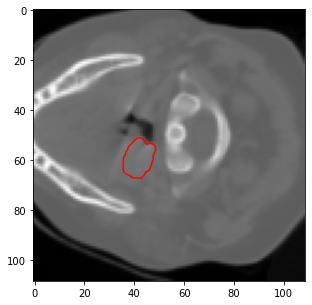

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(X[12, :, :,83], cmap="gray")
ax.contour(y[12, :, : ,83], [.5], colors="red")

In [322]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    sum_y_true = K.sum(y_true_f)
    sum_y_pred = K.sum(y_pred_f)
    
    return ((2. * intersection + 1.) / (sum_y_true + sum_y_pred + 1.))

def dice_coef_loss(y_true, y_pred):
    return (1 - dice_coef(y_true, y_pred))

In [323]:
# return value of (2*intersection+1)/(sum_y_true+sum_y_pred+1)
dice_coef(y, y)

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

In [202]:
dice_coef_loss(y, y)

<tf.Tensor: shape=(), dtype=float64, numpy=0.07558210045731362>

In [204]:
# return value of the intersection
dice_coef(y, y)

<tf.Tensor: shape=(), dtype=float64, numpy=1126670.0680556346>

In [189]:
dice_coef_loss(y, y)

<tf.Tensor: shape=(), dtype=float64, numpy=1.0017570721307856>

In [194]:
dice_coef(X, X)

<tf.Tensor: shape=(), dtype=float64, numpy=-1435.0013445690022>

In [196]:
dice_coef_loss(X, X)

<tf.Tensor: shape=(), dtype=float64, numpy=1436.0013445690022>

In [229]:
X_train = np.zeros((10,109,109,109))
y_train = np.zeros((10,109,109,109))
img_list=[]
mask_list=[]

In [230]:
img1 = np.zeros((109, 109))
mask1 = np.zeros((109, 109))
img1[:,:]=X[0,:,:,56]
mask1[:,:]=y[0,:,:,56]
img1 = np.repeat(img1[None,...], 109, axis=0)
mask1 = np.repeat(mask1[None,...], 109, axis=0)
img_list.append(img1)
mask_list.append(mask1)

In [231]:
img2 = np.zeros((109, 109))
mask2 = np.zeros((109, 109))
img2[:,:]=X[24,:,:,75]
mask2[:,:]=y[24,:,:,75]
img2 = np.repeat(img2[None,...], 109, axis=0)
mask2 = np.repeat(mask2[None,...], 109, axis=0)
img_list.append(img2)
mask_list.append(mask2)

In [232]:
img3 = np.zeros((109, 109))
mask3 = np.zeros((109, 109))
img3[:,:]=X[51,:,:,60]
mask3[:,:]=y[51,:,:,60]
img3 = np.repeat(img3[None,...], 109, axis=0)
mask3 = np.repeat(mask3[None,...], 109, axis=0)
img_list.append(img3)
mask_list.append(mask3)

In [233]:
img4 = np.zeros((109, 109))
mask4 = np.zeros((109, 109))
img4[:,:]=X[101,:,:,75]
mask4[:,:]=y[101,:,:,75]
img4 = np.repeat(img4[None,...], 109, axis=0)
mask4 = np.repeat(mask4[None,...], 109, axis=0)
img_list.append(img4)
mask_list.append(mask4)

In [234]:
img5 = np.zeros((109, 109))
mask5 = np.zeros((109, 109))
img5[:,:]=X[122,:,:,35]
mask5[:,:]=y[122,:,:,35]
img5 = np.repeat(img5[None,...], 109, axis=0)
mask5 = np.repeat(mask5[None,...], 109, axis=0)
img_list.append(img5)
mask_list.append(mask5)

In [235]:
img6 = np.zeros((109, 109))
mask6 = np.zeros((109, 109))
img6[:,:]=X[150,:,:,40]
mask6[:,:]=y[150,:,:,40]
img6 = np.repeat(img6[None,...], 109, axis=0)
mask6 = np.repeat(mask6[None,...], 109, axis=0)
img_list.append(img6)
mask_list.append(mask6)

In [236]:
img7 = np.zeros((109, 109))
mask7 = np.zeros((109, 109))
img7[:,:]=X[175,:,:,60]
mask7[:,:]=y[175,:,:,60]
img7 = np.repeat(img7[None,...], 109, axis=0)
mask7 = np.repeat(mask7[None,...], 109, axis=0)
img_list.append(img7)
mask_list.append(mask7)

In [237]:
img8 = np.zeros((109, 109))
mask8 = np.zeros((109, 109))
img8[:,:]=X[198,:,:,70]
mask8[:,:]=y[198,:,:,70]
img8 = np.repeat(img8[None,...], 109, axis=0)
mask8 = np.repeat(mask8[None,...], 109, axis=0)
img_list.append(img8)
mask_list.append(mask8)

In [238]:
img9 = np.zeros((109, 109))
mask9 = np.zeros((109, 109))
img9[:,:]=X[75,:,:,60]
mask9[:,:]=y[75,:,:,60]
img9 = np.repeat(img9[None,...], 109, axis=0)
mask9 = np.repeat(mask9[None,...], 109, axis=0)
img_list.append(img9)
mask_list.append(mask9)

In [239]:
img10 = np.zeros((109, 109))
mask10 = np.zeros((109, 109))
img10[:,:]=X[12,:,:,83]
mask10[:,:]=y[12,:,:,83]
img10 = np.repeat(img10[None,...], 109, axis=0)
mask10 = np.repeat(mask10[None,...], 109, axis=0)
img_list.append(img10)
mask_list.append(mask10)

In [240]:
X_train[:,:,:,:]=img_list

In [241]:
y_train[:,:,:,:]=mask_list

In [160]:
X_train.shape

(3, 109, 109, 109)

In [248]:
y_train[y_train>0] = 1

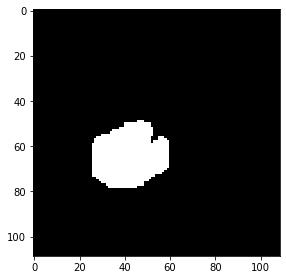

In [259]:
imshow(y_train[0,40,:,:])

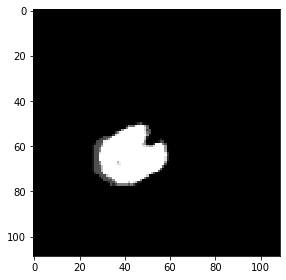

In [34]:
imshow(mask1)

In [77]:
from visualization import all_axes, og_slice, rs_slice

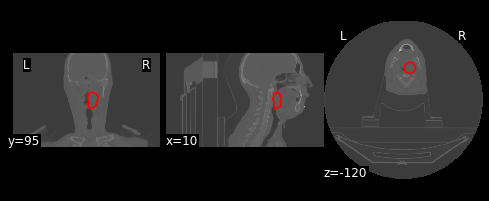

In [101]:
all_axes("CHGJ062", 10, 95, -120)